In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera

positively skewed


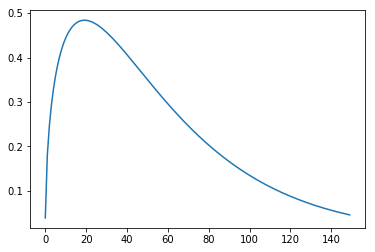

In [6]:
xs2 = np.linspace(stats.gamma.ppf(0.01,0.7,loc=-1), stats.gamma.ppf(0.99,0.7,loc=-1), 150) + 1
X = stats.gamma.pdf(xs2, 1.5)
skew = stats.skew(X)

plt.plot(X)

if skew > 0:
    print('positively skewed')
else:
    print('negatively skewed')

In [12]:
!pip install pandas-datareader


0.2903187461280564


(array([ 1.,  1.,  0.,  1.,  4., 12.,  8.,  9., 10., 22., 54., 90., 97.,
        62., 54., 23., 20., 10.,  8.,  9.,  2.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  1.]),
 array([-0.09403895, -0.08638978, -0.07874062, -0.07109145, -0.06344228,
        -0.05579312, -0.04814395, -0.04049478, -0.03284562, -0.02519645,
        -0.01754728, -0.00989812, -0.00224895,  0.00540022,  0.01304938,
         0.02069855,  0.02834772,  0.03599688,  0.04364605,  0.05129522,
         0.05894438,  0.06659355,  0.07424272,  0.08189188,  0.08954105,
         0.09719022,  0.10483938,  0.11248855,  0.12013772,  0.12778689,
         0.13543605]),
 <a list of 30 Patch objects>)

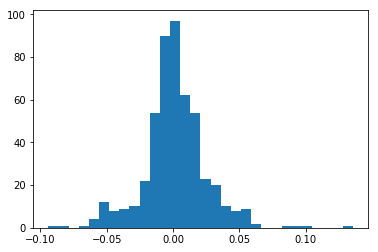

In [13]:
from datetime import datetime
import pandas_datareader as pdr
prices =  pdr.data.DataReader('NFLX', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]

returns = prices.pct_change()[1:]

print(stats.skew(returns))

plt.hist(returns, 30)

negative excess kurtosis, platykurtic distribution. Fewer large jumps away from the mean 


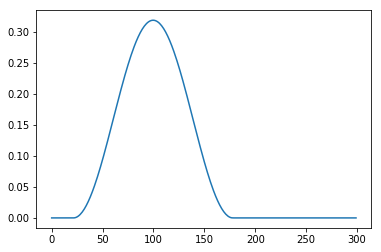

In [16]:
xs = np.linspace(-6,6,300) + 2
Y = stats.cosine.pdf(xs)

kurt = stats.kurtosis(Y)

print('negative excess kurtosis, platykurtic distribution. Fewer large jumps away from the mean ')

plt.plot(Y)

The historical returns of NFLX are strongly leptokurtic. Because of a leptokurtic distribution`s fatter tails, small changes in prices happen less often and large changes are more common. This makes the stock a riskier investment.


(array([ 1.,  1.,  0.,  1.,  4., 12.,  8.,  9., 10., 22., 54., 90., 97.,
        62., 54., 23., 20., 10.,  8.,  9.,  2.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  1.]),
 array([-0.09403895, -0.08638978, -0.07874062, -0.07109145, -0.06344228,
        -0.05579312, -0.04814395, -0.04049478, -0.03284562, -0.02519645,
        -0.01754728, -0.00989812, -0.00224895,  0.00540022,  0.01304938,
         0.02069855,  0.02834772,  0.03599688,  0.04364605,  0.05129522,
         0.05894438,  0.06659355,  0.07424272,  0.08189188,  0.08954105,
         0.09719022,  0.10483938,  0.11248855,  0.12013772,  0.12778689,
         0.13543605]),
 <a list of 30 Patch objects>)

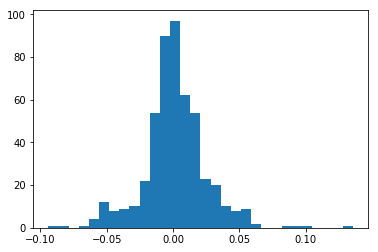

In [23]:
prices =  pdr.data.DataReader('NFLX', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]

returns = prices.pct_change()[1:]

kurt = stats.kurtosis(returns)

if kurt < 0:
    print('negative excess kurtosis, platykurtic distribution. Fewer large jumps away from the mean ')
else:
    print('The historical returns of NFLX are strongly leptokurtic. Because of a leptokurtic distribution`s fatter tails, small changes in prices happen less often and large changes are more common. This makes the stock a riskier investment.')

plt.hist(returns, 30)

positively skewed, more frequency lless than mean


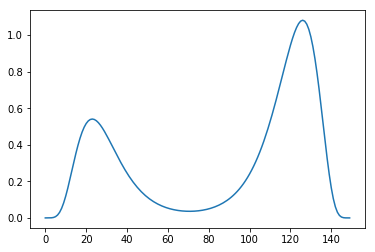

In [25]:
xs2 = np.linspace(stats.lognorm.ppf(0.01,0.7,loc=-.1), stats.lognorm.ppf(0.99,0.7,loc=-.1), 150)
lognorm = stats.lognorm.pdf(xs2, 0.4)

Z = lognorm/2 + lognorm[::-1]

skew = stats.skew(Z)

if skew >0:
    print('positively skewed, more frequency lless than mean')
else:
    print('negatively skewed, more frequency above the mean')
    
plt.plot(Z)

In [26]:
from statsmodels.stats.stattools import jarque_bera

#null hypothesis = normal distribution
# thus p values < 0.05 indicates non normal distribution

N=1000
M=1000

pvalues = np.ndarray((N))

for i in range(N):
    X = np.random.normal(0,1, M)
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
num_significant = len(pvalues[pvalues < 0.05])

print(float(num_significant) / N)

0.053


In [30]:
_, p_value, _, _ = jarque_bera(Z)

print(p_value)

'not normal - null hypothesis is it is normal. since p value is < 0.05, which is our significance level, it is not normal'

1.6768991741743907e-07


'not normal - null hypothesis is it is normal. since p value is < 0.05, which is our significance level, it is not normal'

'multimodal distribution. skewness led us to believe it is positively skewed. However, the distribution of Z is bimodal. in order for skewness to be useful the underlying distribution must be somewhat normal'

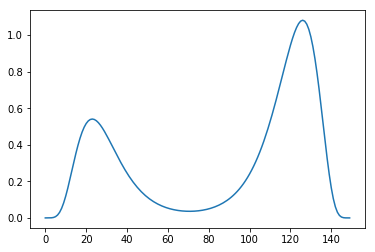

In [32]:
plt.plot(Z)

'multimodal distribution. skewness led us to believe it is positively skewed. However, the distribution of Z is bimodal. in order for skewness to be useful the underlying distribution must be somewhat normal'

1.017106268464578


'positively skewed'

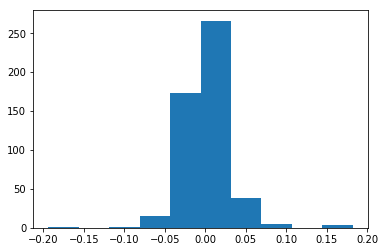

In [36]:
prices =  pdr.data.DataReader('NFLX', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2016,1,1)).iloc[:, -1]

returns = prices.pct_change()[1:]

plt.hist(returns)

print(stats.skew(returns))
'positively skewed'

-0.6565228286334943


'negatively skewed'

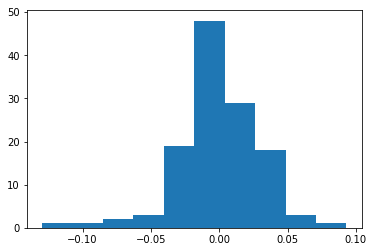

In [39]:
prices =  pdr.data.DataReader('NFLX', data_source='yahoo', start=datetime(2016,1,1), end=datetime(2016,7,1)).iloc[:, -1]

returns = prices.pct_change()[1:]

plt.hist(returns)

print(stats.skew(returns))
'out of sample results volatile - negatively skewed - thus skew may not be reliable over time'

'the rolling 30 day skew changes quite a lot and hence may not be reliable over time'

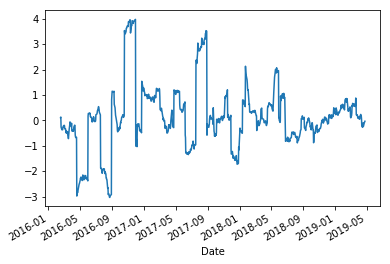

In [45]:
prices =  pdr.data.DataReader('NFLX', data_source='yahoo', start=datetime(2016,1,1), end=datetime(2019,7,1)).iloc[:, -1]

returns = prices.pct_change()[1:]

returns.rolling(30).skew().plot()
'the rolling 30 day skew changes quite a lot and hence may not be reliable over time'